## DATA ANALYSIS ON QUOTES

In [1]:
import sqlite3
import numpy as np
import pandas as pd
import ast
from matplotlib import pyplot as plt

### LOAD DATA

In [2]:
connection = sqlite3.connect('./data/quotes.sqlite')
# cursor = connection.execute('select * from bar')

df = pd.read_sql_query(r"SELECT * FROM quotes", connection)
# quotes = pd.read_sql_query(r'select author, count(author) from quotes group by author', connection)
# quotes = pd.read_sql_query(r'select title, count(title) from quotes group by title', connection)

print("Dataset shape: ", df.shape)
print(df.head(10))

Dataset shape:  (348085, 5)
                                               QUOTE          AUTHOR  \
0  “My life amounts to no more than one drop in a...  David Mitchell   
1  “A half-read book is a half-finished love affa...  David Mitchell   
2  “Our lives are not our own. We are bound to ot...  David Mitchell   
3            “Travel far enough, you meet yourself.”  David Mitchell   
4  “Books don't offer real escape, but they can s...  David Mitchell   
5  “I believe there is another world waiting for ...  David Mitchell   
6  “People pontificate, "Suicide is selfishness."...  David Mitchell   
7  “You say you're 'depressed' - all i see is res...  David Mitchell   
8  “Power, time, gravity, love. The forces that r...  David Mitchell   
9  “Unlimited power in the hands of limited peopl...  David Mitchell   

         TITLE  LIKES                                               TAGS  
0  Cloud Atlas   4589                                               None  
1  Cloud Atlas   3181        

In [3]:
def get_tags_dict():
    tags = {}
    for tag in df["TAGS"]:
        if tag == "None":
            tag_list = []
            tags["None"] = tags.get("None", 0)+1
        else:
            tag_list = ast.literal_eval(tag)
        for tag_el in tag_list:
            tags[tag_el] = tags.get(tag_el, 0)+1
    return tags
tags_dict = get_tags_dict()

In [4]:
tags = []
counts = []
for key,value in tags_dict.items():
    if value >250 and key != "None":
        tags.append(key)
        counts.append(value)
print(len(tags))

73


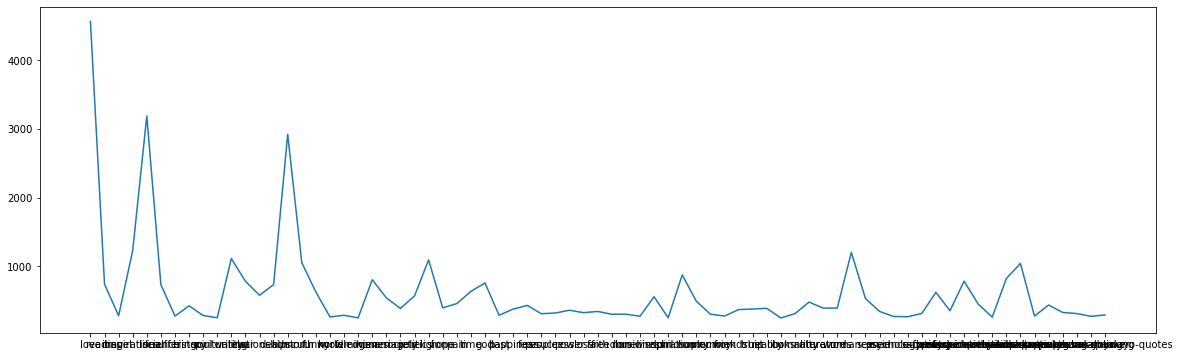

In [5]:
plt.figure(figsize=(20, 6))
plt.plot(tags, counts)
plt.show()

## Removing redundant  rows

### Empty quotes

In [3]:
print("----------------------------------")
print("Before:")
print(df[df["QUOTE"] == ""])
df = df.drop(df[df["QUOTE"] == ""].index)
print("----------------------------------")
print("After:")
print(df[df["QUOTE"] == ""])

----------------------------------
Before:
       QUOTE           AUTHOR TITLE  LIKES  TAGS
348076        Terry Pratchett  None    179  None
----------------------------------
After:
Empty DataFrame
Columns: [QUOTE, AUTHOR, TITLE, LIKES, TAGS]
Index: []


In [8]:
dt = df["TITLE"].value_counts().to_dict()

books = []
for book_title, count in dt.items():
    if count>250:
        books.append(book_title)
print("Total books: ", len(books))
for book in books:
    print(book)

Total books:  109
None
Les Misérables
The Book Thief
Steve Jobs
The Goldfinch
Eat, Pray, Love
Gone Girl
Fahrenheit 451
Alexander Hamilton
Quiet: The Power of Introverts in a World That Can't Stop Talking
Shantaram
Between the World and Me
Comanche Moon
All the Light We Cannot See
Life of Pi
Tools of Titans: The Tactics, Routines, and Habits of Billionaires, Icons, and World-Class Performers
The Fault in Our Stars
The Brothers Karamazov
A Short History of Nearly Everything
Dark Prince
Little Women
Americanah
Extremely Loud and Incredibly Close
Fire and Fury: Inside the Trump White House
Big Magic: Creative Living Beyond Fear
Siddhartha
Cloud Atlas
The Unbearable Lightness of Being
Tuesdays with Morrie
Armas de titanes: Los secretos, trucos y costumbres de aquellos que han alcanzado el éxito
The Handmaid's Tale
Tribe of Mentors: Short Life Advice from the Best in the World
Fight Club
A Game of Thrones
Creativity, Inc.: Overcoming the Unseen Forces That Stand in the Way of True Inspiratio

In [28]:
df[df["TITLE"] == "Tools of Titans: The Tactics, Routines, and Habits of Billionaires, Icons, and World-Class Performers"]["AUTHOR"].value_counts()

Timothy Ferriss    552
Name: AUTHOR, dtype: int64

In [117]:
df["AUTHOR"].value_counts()

Timothy Ferriss    2005
Ilona Andrews      1952
Jim Butcher        1928
Walter Isaacson    1917
Sarah J. Maas      1906
                   ... 
Abigail George        1
Declan Davey          1
Thierry Jonquet       1
Jenny Baranick        1
Roger Shattuck        1
Name: AUTHOR, Length: 8121, dtype: int64

In [120]:
df["TITLE"].replace("None", np.nan, inplace=True)

In [123]:
df["TITLE"].value_counts()

Les Misérables                                                                                                                                                                   1200
The Book Thief                                                                                                                                                                   1163
Steve Jobs                                                                                                                                                                       1128
The Goldfinch                                                                                                                                                                     872
Eat, Pray, Love                                                                                                                                                                   869
                                                                                          

In [130]:
counts = df["TITLE"].value_counts(dropna=False) 
valids = counts[counts>250].index
print(list(valids))

[nan, 'Les Misérables', 'The Book Thief', 'Steve Jobs', 'The Goldfinch', 'Eat, Pray, Love', 'Gone Girl', 'Fahrenheit 451', 'Alexander Hamilton', "Quiet: The Power of Introverts in a World That Can't Stop Talking", 'Shantaram', 'Between the World and Me', 'Comanche Moon', 'All the Light We Cannot See', 'Life of Pi', 'Tools of Titans: The Tactics, Routines, and Habits of Billionaires, Icons, and World-Class Performers', 'The Fault in Our Stars', 'The Brothers Karamazov', 'A Short History of Nearly Everything', 'Dark Prince', 'Little Women', 'Americanah', 'Extremely Loud and Incredibly Close', 'Fire and Fury: Inside the Trump White House', 'Big Magic: Creative Living Beyond Fear', 'Siddhartha', 'Cloud Atlas', 'The Unbearable Lightness of Being', 'Tuesdays with Morrie', 'Armas de titanes: Los secretos, trucos y costumbres de aquellos que han alcanzado el éxito', "The Handmaid's Tale", 'Tribe of Mentors: Short Life Advice from the Best in the World', 'Fight Club', 'A Game of Thrones', 'Crea

In [131]:
quotes[quotes["TITLE"]=="Les Misérables"]

,QUOTE,AUTHOR,TITLE,LIKES,TAGS
76221,"“In 1804, M. Myriel was the Cure of B—— [Brign...",Victor Hugo,Les Misérables,3,None
76222,"“Her heart ached, but she took her resolution....",Victor Hugo,Les Misérables,3,None
76223,“No temamos nunca ni a los ladrones ni a los a...,Victor Hugo,Les Misérables,3,None
76225,"“She could become a child again, run and froli...",Victor Hugo,Les Misérables,3,None
76226,"“There are souls which, crab-like, crawl conti...",Victor Hugo,Les Misérables,3,None
...,...,...,...,...,...
186084,“to be ultra is to go beyond. is to attack the...,Victor Hugo,Les Misérables,3,None
186085,"“Ever since history has been written, ever sin...",Victor Hugo,Les Misérables,3,['misery']
186086,"“Ingrates!"" says the garment, ""I protected you...",Victor Hugo,Les Misérables,3,None
186088,“We have both been talking about you. Cosette ...,Victor Hugo,Les Misérables,3,['whiplash']


In [37]:
quotes[quotes["TAGS"]=="None"]

,QUOTE,AUTHOR,TITLE,LIKES,TAGS
0,“My life amounts to no more than one drop in a...,David Mitchell,Cloud Atlas,4589,None
2,“Our lives are not our own. We are bound to ot...,David Mitchell,Cloud Atlas,2534,None
8,"“Power, time, gravity, love. The forces that r...",David Mitchell,Cloud Atlas,909,None
9,“Unlimited power in the hands of limited peopl...,David Mitchell,Cloud Atlas,653,None
15,"“We are only what we know, and I wished to be ...",David Mitchell,Cloud Atlas,490,None
...,...,...,...,...,...
348071,“What did I tell you about Mister Safety Catch...,Terry Pratchett,Night Watch,184,None
348072,“He was determined to discover the underlying ...,Terry Pratchett,Mort,183,None
348076,,Terry Pratchett,None,179,None
348078,“It is at this point that normal language give...,Terry Pratchett,The Color of Magic,174,None


In [39]:
quotes.iloc[0]["QUOTE"]

'“My life amounts to no more than one drop in a limitless ocean. Yet what is any ocean, but a multitude of drops?”  \n  ―'

In [ ]:
quotes["TITLE"].value_counts()

In [ ]:
value_counts

In [ ]:
threshold